## Памятка для понимания значений и интерпретации результатов

### **1. IC₅₀ (Half Maximal Inhibitory Concentration)**  
- **Определение:** Концентрация вещества, необходимая для **подавления** биологического процесса (например, репликации вируса, активности фермента) на **50%** по сравнению с контролем.  
- **Применение:**  
  - В противовирусных исследованиях — показывает, насколько эффективно вещество блокирует вирус.  
  - Чем **меньше IC₅₀**, тем выше эффективность соединения.  

### **2. CC₅₀ (Half Maximal Cytotoxic Concentration)**  
- **Определение:** Концентрация вещества, вызывающая **гибель 50% клеток** в эксперименте (токсичность).  
- **Применение:**  
  - Отражает **цитотоксичность** вещества для здоровых клеток.  
  - Чем **выше CC₅₀**, тем безопаснее соединение.  

### **3. SI (Selectivity Index — Индекс Селективности)**  
- **Формула:**  
  $ SI = \frac{CC_{50}}{IC_{50}}   $
- **Смысл:** Показывает, насколько вещество **избирательно** действует на мишень (например, вирус), а не на клетки хозяина.  
  - **SI > 10** — считается приемлемым для потенциальных лекарств.  
  - **SI > 100** — высокая селективность, минимальная токсичность.  

### **Пример интерпретации:**  
Если у препарата:  
- **IC₅₀ = 1 μM** (хорошо подавляет вирус),  
- **CC₅₀ = 100 μM** (низкая токсичность),  
то **SI = 100** — отличный кандидат для дальнейших исследований.  

Эти параметры критически важны при скрининге новых лекарств, особенно противовирусных (например, против ВИЧ, SARS-CoV-2).

In [1]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_excel('data/Данные_для_курсовои_Классическое_МО.xlsx')
# Удаляем нумерацию что бы она нам не мешалась
df.drop(['Unnamed: 0'], inplace = True, axis = 1)
# Проверка на наличие пропущенных значений
missing_df = pd.DataFrame({
    "Количество пропусков": df.isnull().sum(),
    "Доля пропусков (%)": (df.isnull().mean() * 100).round(2)
})

missing_df = missing_df[missing_df["Количество пропусков"] > 0]

print("Статистика пропусков:")
missing_df

Статистика пропусков:


,Количество пропусков,Доля пропусков (%)
MaxPartialCharge,3,0.3
MinPartialCharge,3,0.3
MaxAbsPartialCharge,3,0.3
MinAbsPartialCharge,3,0.3
BCUT2D_MWHI,3,0.3
BCUT2D_MWLOW,3,0.3
BCUT2D_CHGHI,3,0.3
BCUT2D_CHGLO,3,0.3
BCUT2D_LOGPHI,3,0.3
BCUT2D_LOGPLOW,3,0.3


In [3]:
df.fillna(0, inplace=True)
df

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,12.934891,12.934891,0.048029,-0.476142,0.382752,49.133333,414.542,...,0,0,0,0,0,0,0,0,0,0
997,31.999934,33.999415,1.062484,13.635345,13.635345,0.030329,-0.699355,0.369425,44.542857,485.621,...,0,0,0,0,0,0,0,0,0,0
998,30.999883,33.999458,1.096761,13.991690,13.991690,0.026535,-0.650790,0.284923,41.973684,545.742,...,1,0,0,0,0,0,0,0,0,0
999,31.998959,32.999644,1.031272,13.830180,13.830180,0.146522,-1.408652,0.381559,39.000000,522.635,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Разделение на признаки (X) и целевые переменные (y)
X = df.drop(columns=["IC50, mM", "CC50, mM", "SI"])  # Все фичи, кроме целевых
y_cc50 = df["CC50, mM"]

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from cuml.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 


def compare_regression_models(X, y, test_size=0.2, random_state=42, n_iter=10):
    """
    Сравнивает производительность различных моделей регрессии
    
    Параметры:
    -----------
    X : array-like
        Матрица признаков
    y : array-like
        Вектор целевой переменной
    test_size : float
        Доля тестовой выборки (по умолчанию 0.2)
    random_state : int
        Seed для воспроизводимости (по умолчанию 42)
    
    Возвращает:
    -----------
    pd.DataFrame
        Таблица с результатами оценки моделей
    """
    # Разделение данных
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    

    # Удаление аномалий (только из обучающей выборки!)
    iso_forest = IsolationForest(
        contamination=0.05,  # 5% данных считаем аномалиями
        random_state=random_state,
        n_jobs=-1
    )
    outliers_mask = iso_forest.fit_predict(X_train) == 1  # 1 = нормальные точки, -1 = аномалии
    X_train = X_train[outliers_mask]
    y_train = y_train[outliers_mask]
    
    print(f"Удалено {len(outliers_mask) - sum(outliers_mask)} аномалий ({100*(1 - sum(outliers_mask)/len(outliers_mask)):.1f}% данных)")
    
    # Масштабирование данных
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Модели
    models = {
        "XGBoost": {
            "model": XGBRegressor(random_state=random_state, device="cuda"),
            "params": {
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 5, 7],
                'learning_rate': [0.01, 0.1, 0.2],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0]
            }
        },
        # Нормально не работает с gpu попозже разберусь
        # "LightGBM": {
        #     "model": LGBMRegressor(
        #         random_state=random_state, 
        #         device="gpu",  # Включить GPU
        #         gpu_platform_id=0,  # ID платформы (обычно 0)
        #         gpu_device_id=0     # ID устройства (обычно 0)
        #     ),
        #     "params": {
        #         'n_estimators': [100, 200, 300],
        #         'max_depth': [3, 5, 7, -1],
        #         'learning_rate': [0.01, 0.1, 0.2],
        #         'num_leaves': [31, 50, 100],
        #         'subsample': [0.8, 0.9, 1.0]
        #     }
        # },
        "Random Forest": {
            "model": RandomForestRegressor(random_state=random_state),
            "params": {
                'n_estimators': [100, 200, 300],
                'max_depth': [None, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'bootstrap': [True, False]
            }
        },
        "Neural Network": {
            "model": MLPRegressor(random_state=random_state, early_stopping=True),
            "params": {
                'hidden_layer_sizes': [(64, 32), (128, 64), (64,)],
                'alpha': [0.0001, 0.001, 0.01],
                'learning_rate_init': [0.001, 0.01, 0.1],
                'batch_size': [32, 64, 128]
            }
        }
    }
    
    results = []
    
    # Обучение и оценка
    for name, config in models.items():
        start_time = time.time()
        
        search = RandomizedSearchCV(
            estimator=config["model"],
            param_distributions=config["params"],
            n_iter=n_iter,
            cv=3,
            scoring='neg_mean_squared_error',
            random_state=random_state,
            n_jobs=-1
        )
        
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        
        y_pred = best_model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        results.append({
            'Model': name,
            'RMSE': rmse,
            'R2': r2,
            'MAE': mae,
            'Best Params': search.best_params_,
            'Time (sec)': round(time.time() - start_time, 2)
        })
        print({
            'Model': name,
            'RMSE': rmse,
            'R2': r2,
            'MAE': mae,
            'Best Params': search.best_params_,
            'Time (sec)': round(time.time() - start_time, 2)
        })
        
    results_df = pd.DataFrame(results).set_index('Model')
    
    # Визуализация на одном графике
    plt.figure(figsize=(12, 8))
    
    # Подготовка данных для графика
    metrics = ['RMSE', 'R2', 'MAE']
    colors = ['skyblue', 'lightgreen', 'salmon']
    titles = [
        'RMSE (чем меньше, тем лучше)',
        'R² (чем ближе к 1, тем лучше)',
        'MAE (чем меньше, тем лучше)'
    ]
    
    # Нормализация для совмещения на одном графике
    normalized_df = results_df.copy()
    for metric in metrics:
        normalized_df[metric] = (results_df[metric] - results_df[metric].min()) / \
                               (results_df[metric].max() - results_df[metric].min())
    
    # Построение группированного bar plot
    bar_width = 0.25
    index = np.arange(len(results_df))
    
    for i, metric in enumerate(metrics):
        plt.bar(index + i*bar_width, results_df[metric], bar_width, 
                color=colors[i], label=titles[i])
    
    plt.xlabel('Модели')
    plt.ylabel('Значения метрик')
    plt.title('Сравнение моделей регрессии по различным метрикам', pad=20)
    plt.xticks(index + bar_width, results_df.index)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    
    # Добавление значений на столбцы
    for i, model in enumerate(results_df.index):
        for j, metric in enumerate(metrics):
            plt.text(i + j*bar_width, results_df.loc[model, metric] + 0.05 * results_df.loc[model, metric],
                    f'{results_df.loc[model, metric]:.3f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    return results_df

Удалено 40 аномалий (5.0% данных)


/home/revel/.venv/lib/python3.12/site-packages/cuml/internals/api_decorators.py:317: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return init_func(self, *args, **kwargs)
/home/revel/.venv/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [21:26:19] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/revel/.venv/lib/python3.12/site-packages/xgboost/

{'Model': 'XGBoost', 'RMSE': 464.625965390857, 'R2': 0.5836103432048649, 'MAE': 293.9290645038305, 'Best Params': {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.8}, 'Time (sec)': 38.5}


AttributeError: 'NoneType' object has no attribute 'getHandle'
Exception ignored in: 'cuml.legacy.fil.fil.ForestInference_impl.__dealloc__'
Traceback (most recent call last):
  File "/home/revel/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py", line 109, in _get_memory_usage
    gc.collect()
AttributeError: 'NoneType' object has no attribute 'getHandle'
AttributeError: 'NoneType' object has no attribute 'getHandle'
Exception ignored in: 'cuml.legacy.fil.fil.ForestInference_impl.__dealloc__'
Traceback (most recent call last):
  File "/home/revel/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py", line 109, in _get_memory_usage
    gc.collect()
AttributeError: 'NoneType' object has no attribute 'getHandle'
/home/revel/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memor

{'Model': 'Random Forest', 'RMSE': 451.4122933858691, 'R2': 0.6069572911500704, 'MAE': 278.1825514417777, 'Best Params': {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}, 'Time (sec)': 36.4}
{'Model': 'Neural Network', 'RMSE': 500.8051765036426, 'R2': 0.5162392838021651, 'MAE': 315.15490719920564, 'Best Params': {'learning_rate_init': 0.001, 'hidden_layer_sizes': (64, 32), 'batch_size': 128, 'alpha': 0.0001}, 'Time (sec)': 16.36}


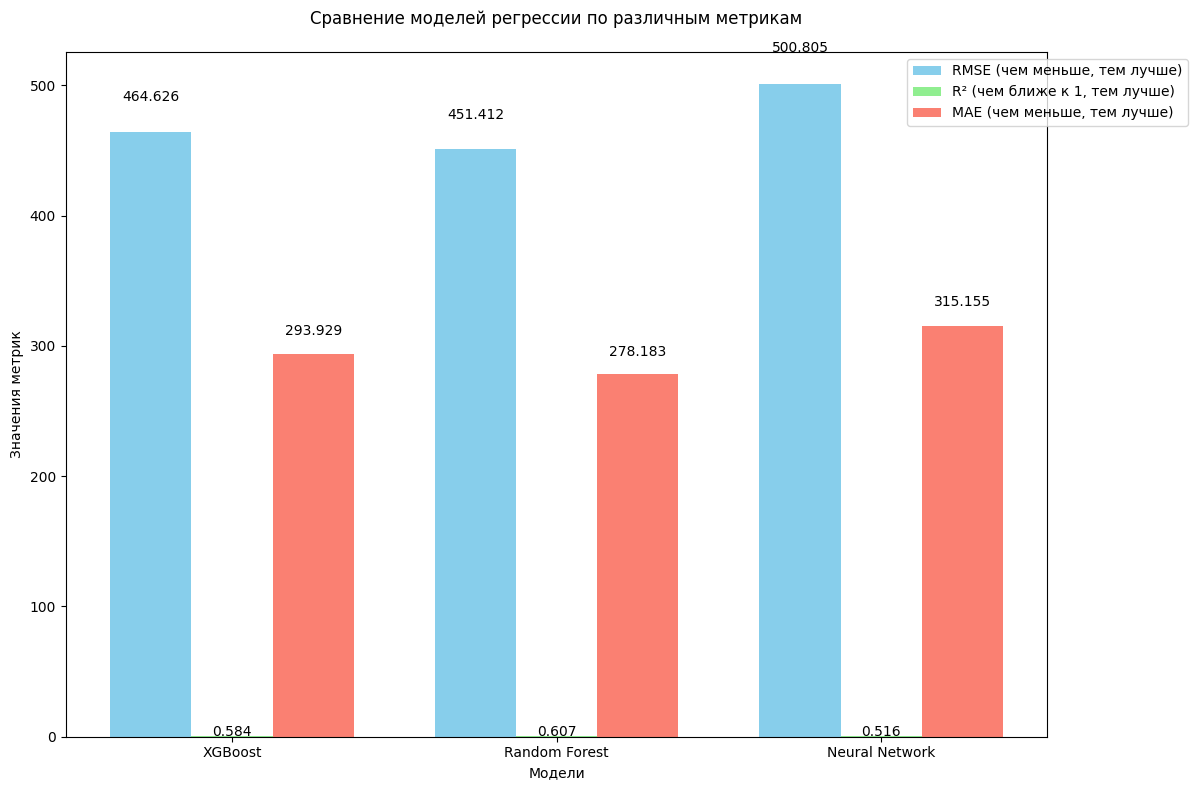

,RMSE,R2,MAE,Best Params,Time (sec)
Model,,,,,
XGBoost,464.625965,0.583610,293.929065,"{'subsample': 0.8, 'n_estimators': 300, 'max_d...",38.50
Random Forest,451.412293,0.606957,278.182551,"{'n_estimators': 100, 'min_samples_split': 5, ...",36.40
Neural Network,500.805177,0.516239,315.154907,"{'learning_rate_init': 0.001, 'hidden_layer_si...",16.36


In [6]:
results = compare_regression_models(X, y_cc50)
results

Качество, ошибки и скорость
Random Forest продемонстрировал наивысшее качество (R²=0.607) с минимальными ошибками (RMSE=451.4, MAE=278.2). XGBoost показал близкие результаты (R²=0.584, RMSE=464.6), но с чуть большими ошибками, тогда как Neural Network заметно отстал (R²=0.516, RMSE=500.8). По скорости Neural Network оказался быстрее (16.4 сек), тогда как Random Forest и XGBoost потребовали около 36-38 секунд.

Гиперпараметры
Random Forest использовал глубокие деревья (max_depth=20) и 100 estimators, что объясняет его высокую точность. XGBoost применял более консервативные настройки (max_depth=7, n_estimators=300) с регуляризацией (subsample=0.8, colsample_bytree=0.8). Neural Network использовал компактную архитектуру (64, 32) с малым размером батча (128) и слабой L2-регуляризацией (alpha=0.0001), что могло ограничить его производительность.

Вывод
Random Forest — лучший выбор для максимальной точности, а XGBoost может служить его ближайшей альтернативой. Neural Network, несмотря на быстроту обучения, значительно уступает в качестве прогнозирования. Если критична скорость, можно рассмотреть XGBoost